In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

iris_url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
resp = requests.get(iris_url)
print(resp.content)

data = BytesIO(resp.content)

b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3,1.4,0.1,setosa\n4.3,3,1.1,0.1,setosa\n5.8,4,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5,3,1.6,0.2,setosa\n5,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3,1.3,0.2,setosa\n5.1,3.4,1.5,0.2,setosa\n5,3

In [23]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

df = pd.read_csv(data)
print(df.iloc[0])

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [12]:
target = df[df.columns[-1]]
target = target.astype('category')
numeric_data = df._get_numeric_data()
print(numeric_data.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [14]:
training_data,testing_data,training_label,testing_label = train_test_split(numeric_data,target.cat.codes)
print(training_data.head())

     sepal_length  sepal_width  petal_length  petal_width
62            6.0          2.2           4.0          1.0
72            6.3          2.5           4.9          1.5
129           7.2          3.0           5.8          1.6
73            6.1          2.8           4.7          1.2
97            6.2          2.9           4.3          1.3


In [24]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(training_data,training_label)

print(tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [26]:
predict_result = tree_model.predict(testing_data)
score_result = tree_model.predict_proba(testing_data)

print(predict_result[0:5])
print(score_result[0:5])

[2 1 0 2 1]
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


In [30]:
matrix = confusion_matrix(testing_label,predict_result)
report = classification_report(testing_label,predict_result,target_names=target.cat.categories)
acc = accuracy_score(testing_label,predict_result)

print(matrix)
print('-----')
print(report)
print('-----')
print(acc)

[[14  0  0]
 [ 0 10  0]
 [ 0  1 13]]
-----
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.91      1.00      0.95        10
  virginica       1.00      0.93      0.96        14

avg / total       0.98      0.97      0.97        38

-----
0.973684210526


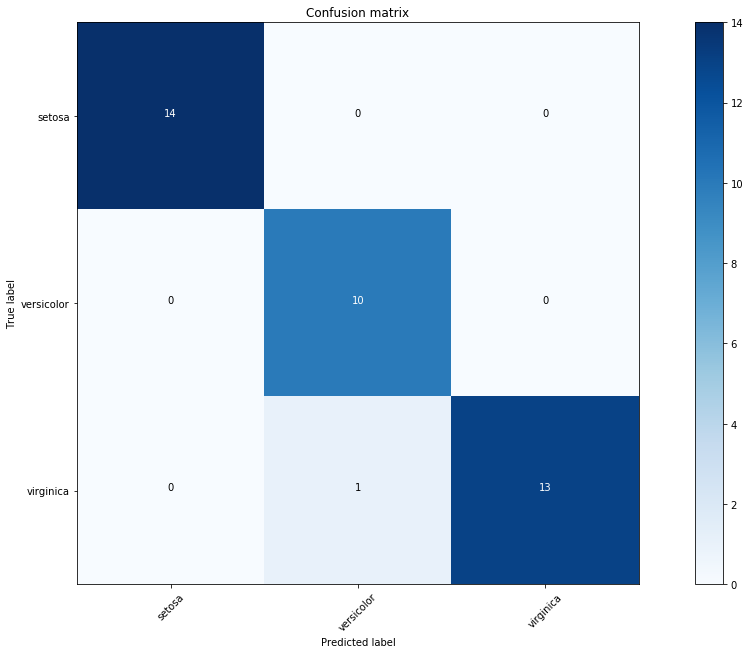

In [39]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(16,9))
plot_confusion_matrix(matrix, classes=target.cat.categories)